## Low level approach to develop simple nerual network (for classification of mnist digits, dataset available in colab) with tensorflow 2.0.0 beta1

In [83]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install tensorflow==2.0.0-beta1

In [84]:
#import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#checking tensorflow and keras version
print(tf.__version__)
tf.print(tf.__version__)
print(tf.keras.__version__)

2.0.0-beta1
2.0.0-beta1
2.2.4-tf


In [85]:
# Load and Prepare MNIST data.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


#checking datatypes
print(x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype)

#coverting to float32 as random generated weight will be in float32
x_train, x_test = tf.cast(x_train, np.float32), tf.cast(x_test, np.float32)
x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype

# Normalize images value as max value is 255
x_train, x_test = x_train / 255, x_test / 255

#checking shape for all and unique labels in target
x_train.shape, y_train.shape, x_test.shape, y_test.shape, np.unique(y_train)

uint8 uint8 uint8 uint8


(TensorShape([60000, 28, 28]),
 (60000,),
 TensorShape([10000, 28, 28]),
 (10000,),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

Traing Set Sample Display:
 image no:50253   Label:3


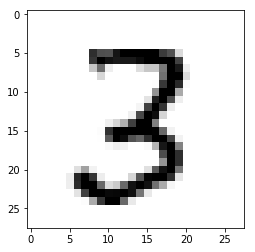

Test Set Sample Display:
 image no:2260   Label:2


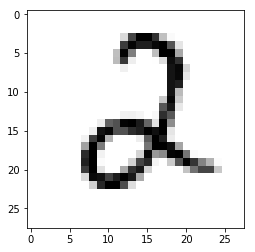

In [86]:
#display image from train set and test set
def display_image_label(featureset, labelset):
  img_no= np.random.randint(0, featureset.shape[0])
  img = featureset[img_no]
  label= labelset[img_no]
  print(f" image no:{img_no}   Label:{label}") # multiplying with 255 as we scaled with it
  plt.imshow(img, cmap=plt.cm.binary)
  plt.show()
  
print("Traing Set Sample Display:\n","="*50)
display_image_label(x_train, y_train)

print("Test Set Sample Display:\n","="*50)
display_image_label(x_test, y_test)

Parameter Settings

In [0]:
# MNIST dataset parameters.
num_classes = 10 # (0-9 digits).
image_vector_size = 784 # (img shape: 28*28)

# Training parameters.
learning_rate = 0.01
training_steps = 4000
batch_size = 156
display_step = 200

# Network parameters.
n_hidden_1 = 128 # hidden layer1
n_hidden_2 = 256 # hidden layer2

In [0]:
# Flatten images  to feed as input
x_train=tf.reshape(x_train, [x_train.shape[0], image_vector_size])
x_test=tf.reshape(x_test, [x_test.shape[0], image_vector_size])

In [0]:
# Use batching of train data
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [0]:
#initialize random normal weight and biases
# Store layers weight & bias

#using random_normal_initializer() of tf r2
normal = tf.random_normal_initializer()

weights = {
    'h1': tf.Variable(normal([image_vector_size, n_hidden_1])),
    'h2': tf.Variable(normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.zeros([n_hidden_1])),
    'b2': tf.Variable(tf.zeros([n_hidden_2])),
    'out': tf.Variable(tf.zeros([num_classes]))
}

In [0]:
# Create model.
def neural_net(x):
    # Hidden fully connected layer with 128 neurons.
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Apply sigmoid to layer_1 output for non-linearity.
    layer_1 = tf.nn.sigmoid(layer_1)
    
    # Hidden fully connected layer with 256 neurons.
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Apply sigmoid to layer_2 output for non-linearity.
    layer_2 = tf.nn.sigmoid(layer_2)
    
    # Output fully connected layer with a neuron for each class.
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(out_layer)

In [0]:
# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [0]:
# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = [weights['h1'],biases['b1'],weights['h2'], biases['b2'], weights['out'], biases['out']]

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

step: 200, loss: 187.4093017578125, accuracy: 0.5192307829856873
step: 400, loss: 61.85900115966797, accuracy: 0.8717948794364929
step: 600, loss: 41.61172866821289, accuracy: 0.9230769276618958
step: 800, loss: 20.700942993164062, accuracy: 0.9679487347602844
step: 1000, loss: 20.320205688476562, accuracy: 0.9807692170143127
step: 1200, loss: 21.944690704345703, accuracy: 0.9551281929016113
step: 1400, loss: 6.767614364624023, accuracy: 1.0
step: 1600, loss: 11.809391021728516, accuracy: 0.9807692170143127
step: 1800, loss: 8.691142082214355, accuracy: 0.9935897588729858
step: 2000, loss: 4.356276512145996, accuracy: 0.9935897588729858
step: 2200, loss: 6.279477119445801, accuracy: 1.0
step: 2400, loss: 6.0885820388793945, accuracy: 0.9935897588729858
step: 2600, loss: 7.443265914916992, accuracy: 0.9935897588729858
step: 2800, loss: 7.843362331390381, accuracy: 0.9871794581413269
step: 3000, loss: 4.230655670166016, accuracy: 1.0
step: 3200, loss: 5.406335830688477, accuracy: 0.99358

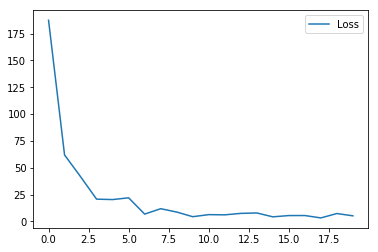

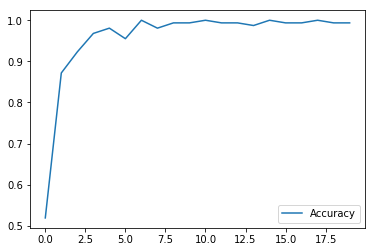

In [94]:
#on training set
#collect loss and accuracy
loss_list, accuracy_list = [], []
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        loss_list.append(loss)
        acc = accuracy(pred, batch_y)
        accuracy_list.append(acc)
        print(f"step: {step}, loss: {loss}, accuracy: {acc}")
   
  
  
# plot loss and accuracy

def loss_plot(l1):
  plt.plot(l1, label="Loss")
  plt.legend()
  plt.show()

def acc_plot(l2):
  plt.plot(l2, label="Accuracy")
  plt.legend()
  plt.show()
  
#call plot  
loss_plot(loss_list)
acc_plot(accuracy_list)

In [95]:
# Test model on validation set.
pred = neural_net(x_test)
print(f"Test Accuracy:{accuracy(pred, y_test)}")
print(f"Loss:{cross_entropy(pred, y_test)}")

Test Accuracy:0.9746000170707703
Loss:831.8665161132812


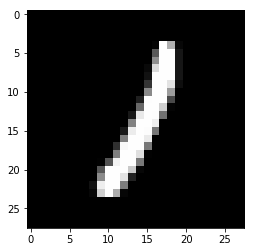

Image No. : 8892 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


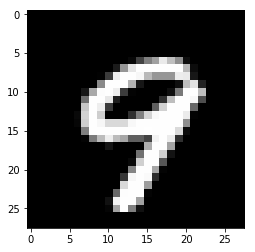

Image No. : 8893 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


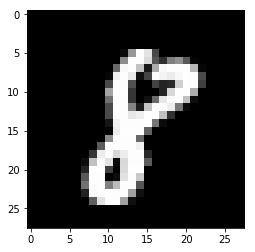

Image No. : 8894 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


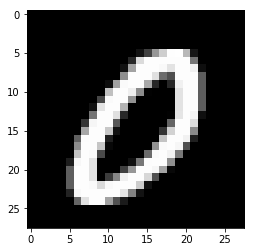

Image No. : 8895 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


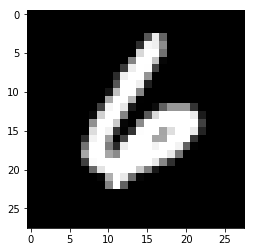

Image No. : 8896 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


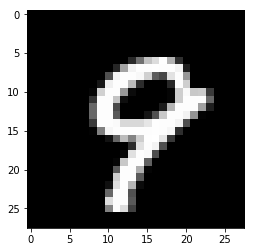

Image No. : 8897 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


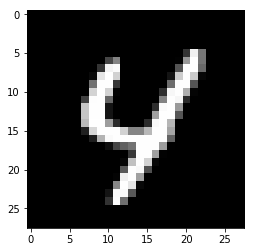

Image No. : 8898 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


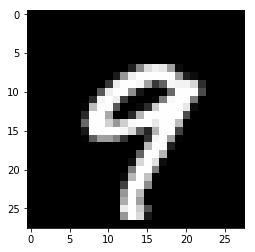

Image No. : 8899 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


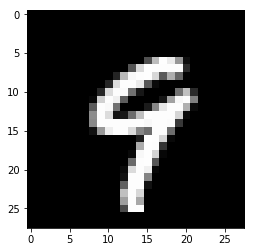

Image No. : 8900 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


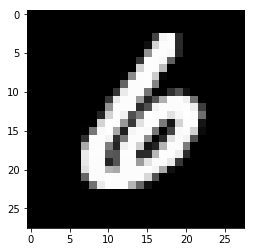

Image No. : 8901 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


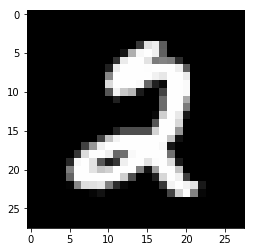

Image No. : 8902 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


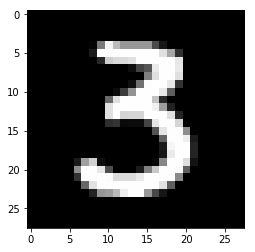

Image No. : 8903 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


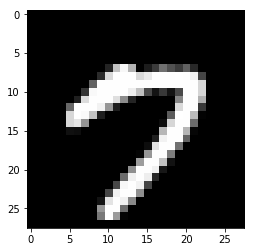

Image No. : 8904 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


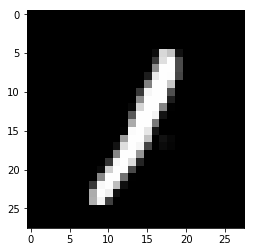

Image No. : 8905 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


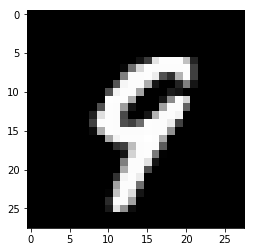

Image No. : 8906 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


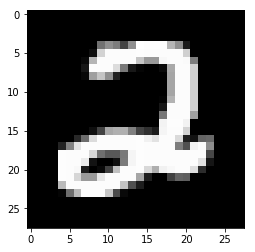

Image No. : 8907 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


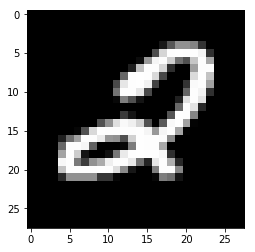

Image No. : 8908 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


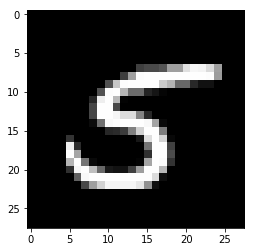

Image No. : 8909 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


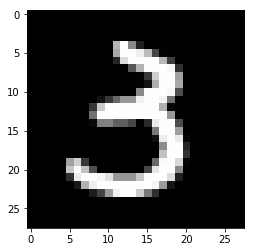

Image No. : 8910 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


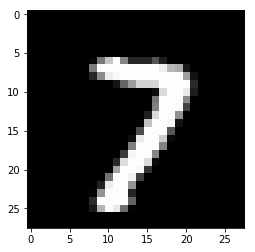

Image No. : 8911 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


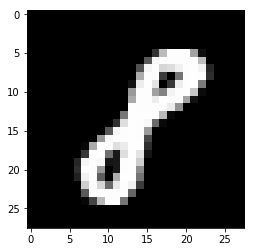

Image No. : 8912 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


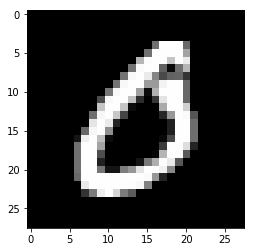

Image No. : 8913 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


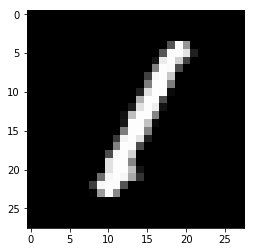

Image No. : 8914 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


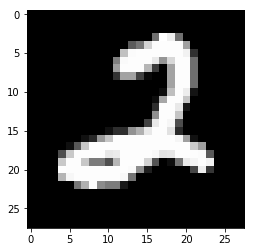

Image No. : 8915 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


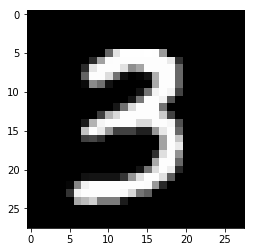

Image No. : 8916 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


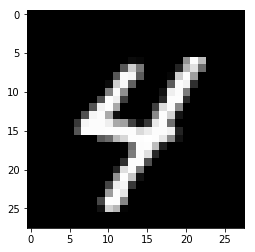

Image No. : 8917 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


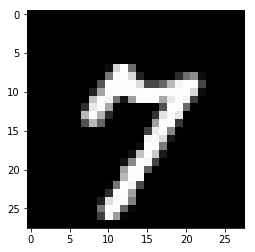

Image No. : 8918 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


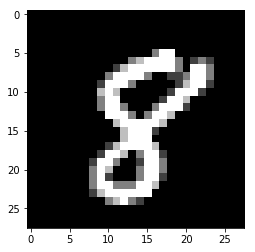

Image No. : 8919 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


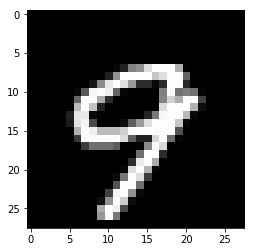

Image No. : 8920 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


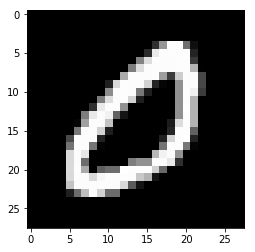

Image No. : 8921 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


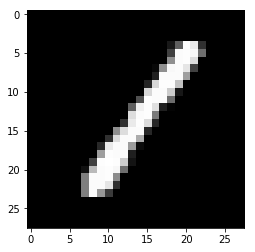

Image No. : 8922 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


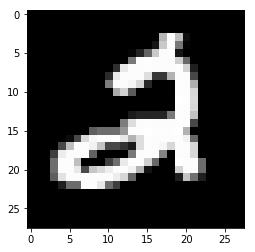

Image No. : 8923 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


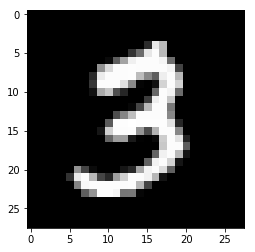

Image No. : 8924 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


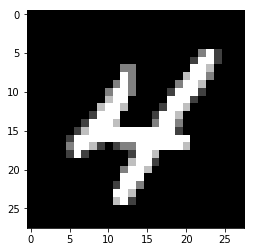

Image No. : 8925 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


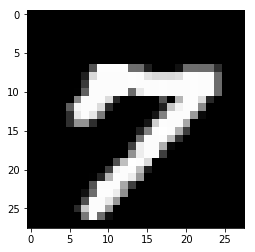

Image No. : 8926 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


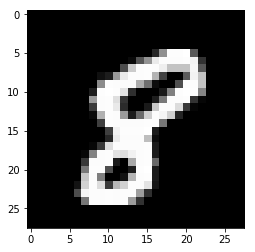

Image No. : 8927 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


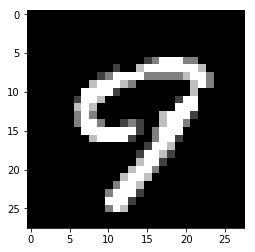

Image No. : 8928 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


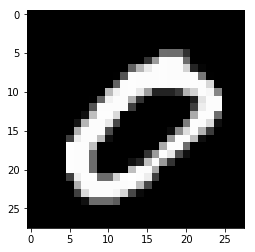

Image No. : 8929 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


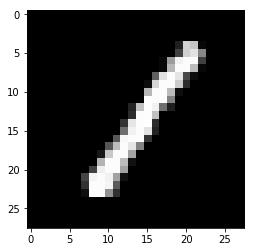

Image No. : 8930 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


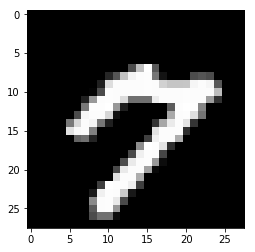

Image No. : 8931 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


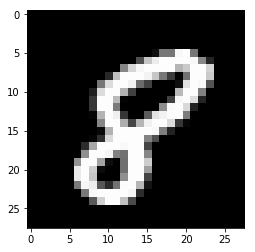

Image No. : 8932 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


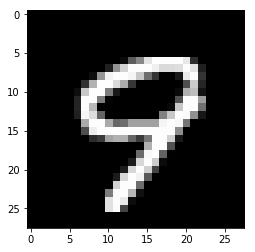

Image No. : 8933 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


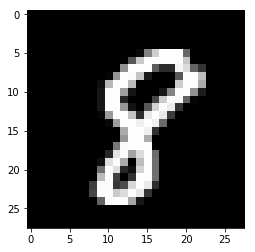

Image No. : 8934 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


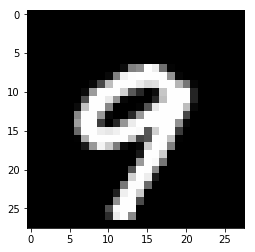

Image No. : 8935 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


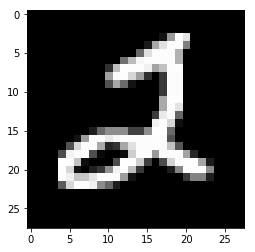

Image No. : 8936 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


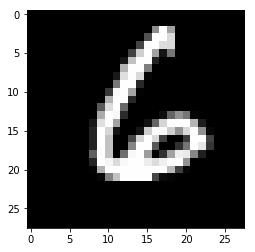

Image No. : 8937 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


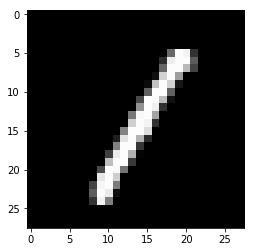

Image No. : 8938 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


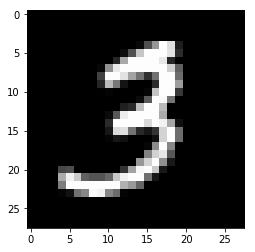

Image No. : 8939 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


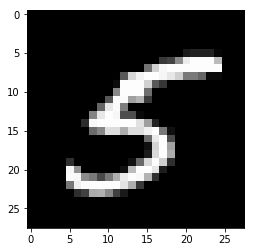

Image No. : 8940 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


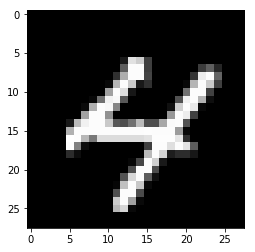

Image No. : 8941 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


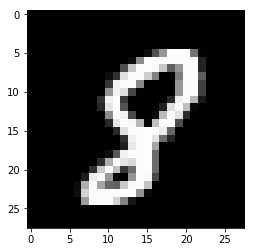

Image No. : 8942 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


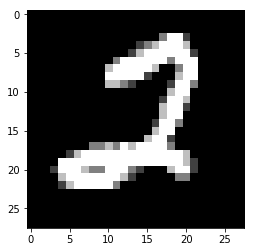

Image No. : 8943 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


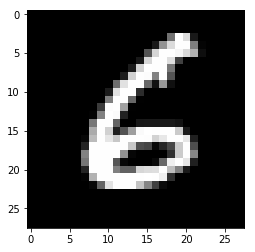

Image No. : 8944 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


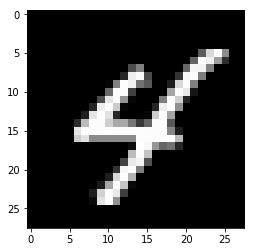

Image No. : 8945 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


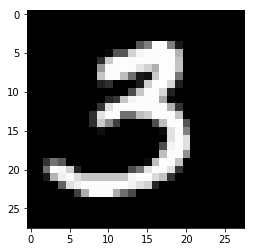

Image No. : 8946 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


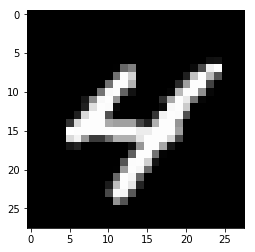

Image No. : 8947 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


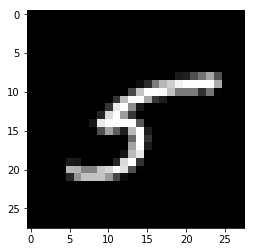

Image No. : 8948 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


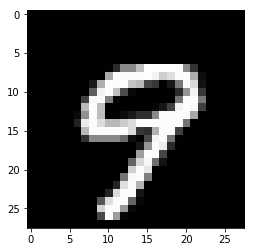

Image No. : 8949 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


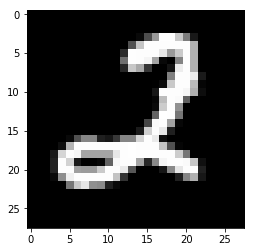

Image No. : 8950 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


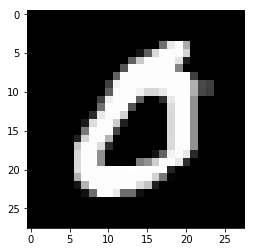

Image No. : 8951 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


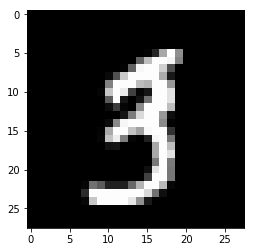

Image No. : 8952 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


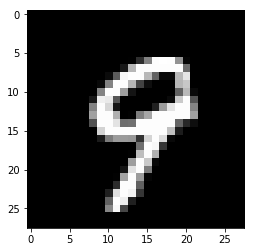

Image No. : 8953 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


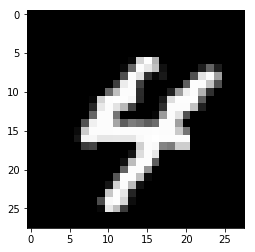

Image No. : 8954 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


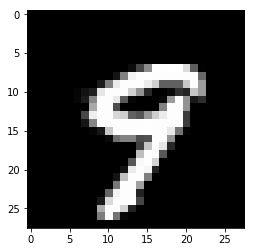

Image No. : 8955 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


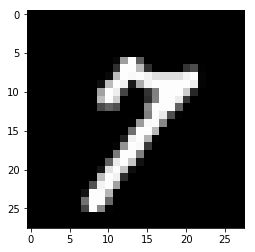

Image No. : 8956 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


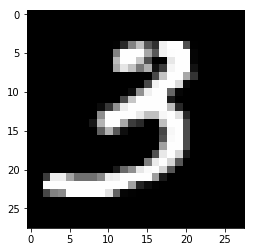

Image No. : 8957 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


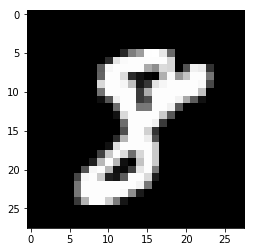

Image No. : 8958 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


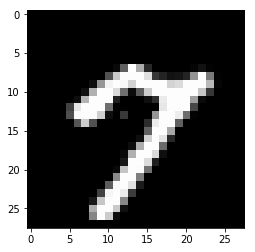

Image No. : 8959 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


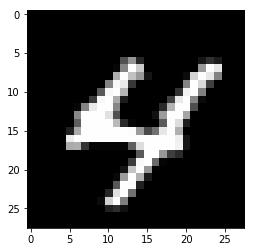

Image No. : 8960 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


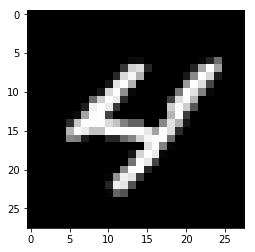

Image No. : 8961 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


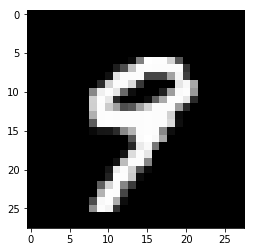

Image No. : 8962 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


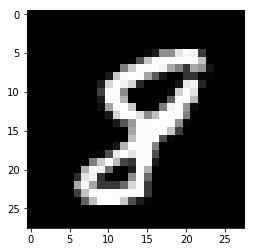

Image No. : 8963 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


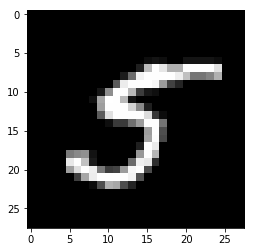

Image No. : 8964 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


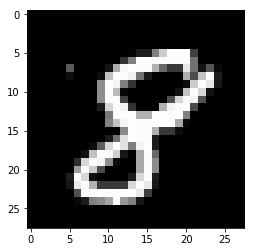

Image No. : 8965 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


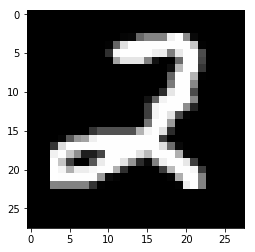

Image No. : 8966 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


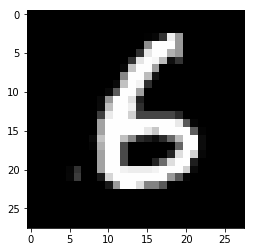

Image No. : 8967 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


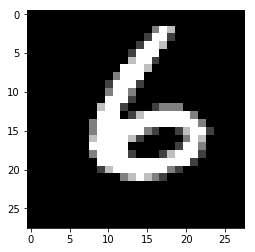

Image No. : 8968 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


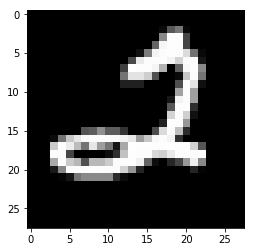

Image No. : 8969 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


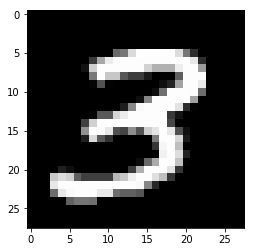

Image No. : 8970 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


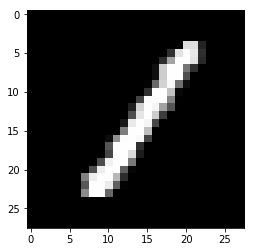

Image No. : 8971 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


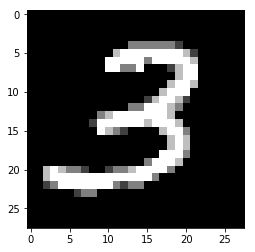

Image No. : 8972 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


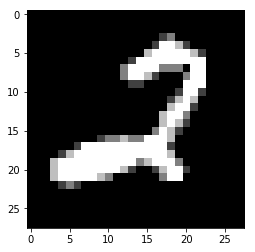

Image No. : 8973 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


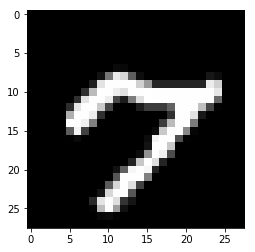

Image No. : 8974 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


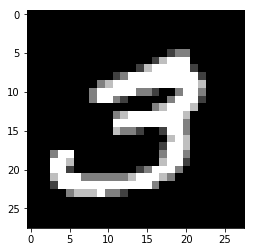

Image No. : 8975 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


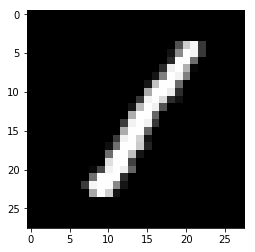

Image No. : 8976 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


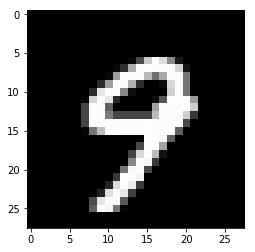

Image No. : 8977 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


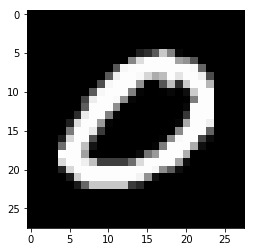

Image No. : 8978 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


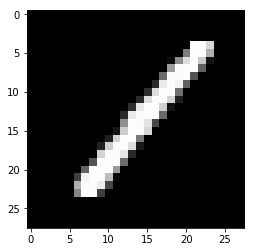

Image No. : 8979 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


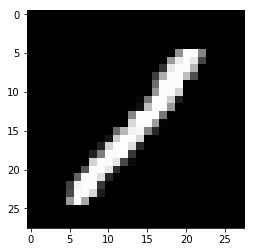

Image No. : 8980 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


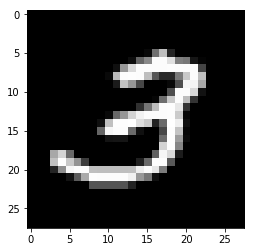

Image No. : 8981 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


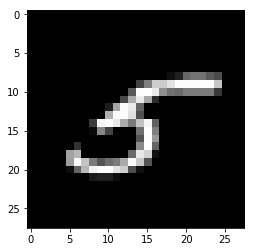

Image No. : 8982 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


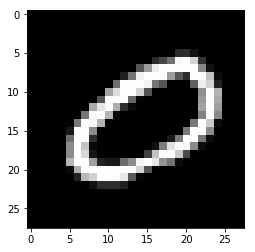

Image No. : 8983 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


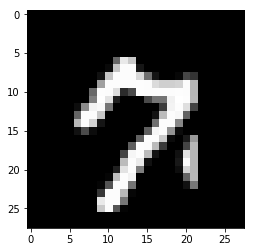

Image No. : 8984 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


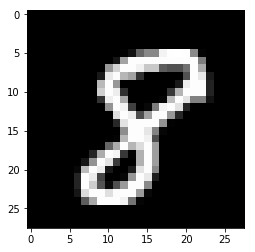

Image No. : 8985 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


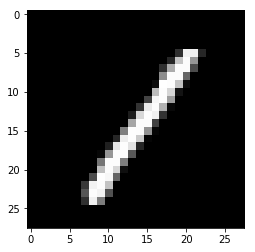

Image No. : 8986 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


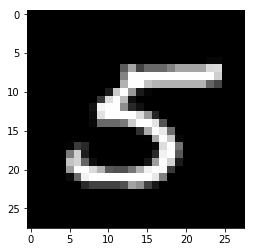

Image No. : 8987 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


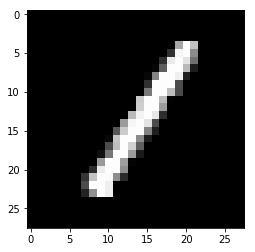

Image No. : 8988 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


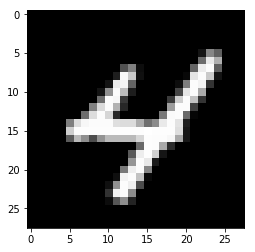

Image No. : 8989 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


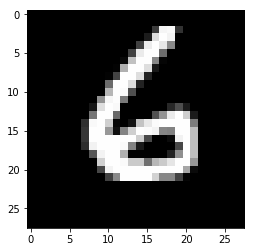

Image No. : 8990 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


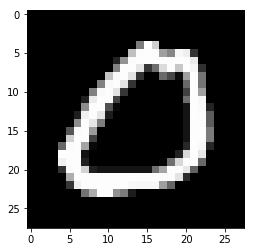

Image No. : 8991 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.
100 prediction out of 100


In [96]:
#random prediction and validation test on 10 images from test data selected randomly

def random_validation_test(test_dataset, test_labelset):
  start_chunk = np.random.randint(0, test_dataset.shape[0])
  end_chunk = start_chunk+100
  images = test_dataset[start_chunk:end_chunk]
  predicted = neural_net(test_dataset[start_chunk:end_chunk]) #model used for prediction
  counter = 0;
  correct = 0;
  for img in range(start_chunk,end_chunk):
    plt.imshow(tf.reshape(test_dataset[img],[28,28]), cmap='gray')
    plt.show()
    pred = np.argmax(predicted.numpy()[counter])
    act_label = test_labelset[img]
    
    if pred == act_label:
      status = "Congratulations! Predicted Correctly."
      correct +=1
    else:
      status = "Opps! Wrong Prediction."
    print(f"Image No. : {img} , Predicted Label by Model :{pred}, Actual Label: {act_label}, Status: {status}")
    
    counter = counter+1;
  print(f"{correct} prediction out of {100}")  
  
random_validation_test(x_test, y_test)